In [ ]:
We'll be answering the following questions:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from datetime import datetime

In [2]:
from __future__ import division
from pandas_datareader import data, wb
import pandas_datareader.data as web

In [3]:
tech_list= ['AAPL','GOOG','MSFT','AMZN'] 

In [4]:
#end date is todays date
end= datetime.now()

#start date is one year old
start=datetime(end.year-1, end.month, end.day)

In [5]:
for stock in tech_list:
    globals()[stock]=data.DataReader(stock,'google',start,end)  #global() makes it a global variable

In [8]:
AAPL.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,121.695556,122.536667,120.998929,121.856667,3.120384e+07
std,18.010830,18.010438,17.918381,17.988001,1.442712e+07
min,92.900000,93.050000,91.500000,92.040000,1.147592e+07
25%,108.582500,109.357500,107.970000,108.832500,2.299466e+07
50%,116.400000,116.885000,115.680000,116.410000,2.714010e+07
75%,139.367500,140.182500,138.820000,139.782500,3.445845e+07
max,156.010000,156.650000,155.050000,156.100000,1.123403e+08


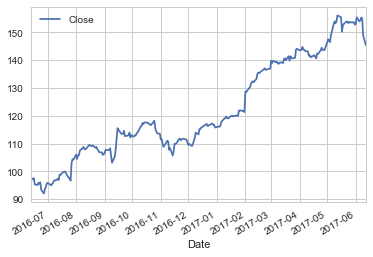

In [9]:
AAPL['Close'].plot(legend=True,)

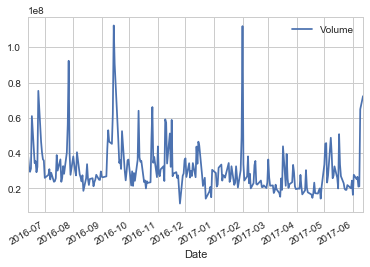

In [10]:
AAPL['Volume'].plot(legend=True,)

In [11]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Close'],ma)

C:\Users\pru\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\pru\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\pru\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


In [12]:
AAPL

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,
2016-06-13,98.69,99.12,97.10,97.34,38020494,NaN,NaN,NaN
2016-06-14,97.32,98.48,96.75,97.46,31931944,NaN,NaN,NaN
2016-06-15,97.82,98.41,97.03,97.14,29445227,NaN,NaN,NaN
2016-06-16,96.45,97.75,96.07,97.55,31326815,NaN,NaN,NaN
2016-06-17,96.62,96.65,95.30,95.33,61008219,NaN,NaN,NaN
2016-06-20,96.00,96.57,95.03,95.10,34411901,NaN,NaN,NaN
2016-06-21,94.94,96.35,94.68,95.91,35546358,NaN,NaN,NaN
2016-06-22,96.25,96.89,95.35,95.55,29219122,NaN,NaN,NaN
2016-06-23,95.94,96.29,95.25,96.10,32240187,NaN,NaN,NaN


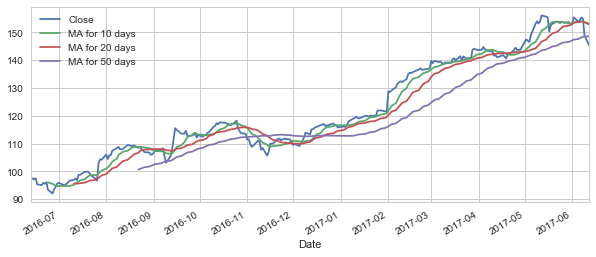

In [13]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [14]:
AAPL['DailyReturn']= AAPL['Close'].pct_change()

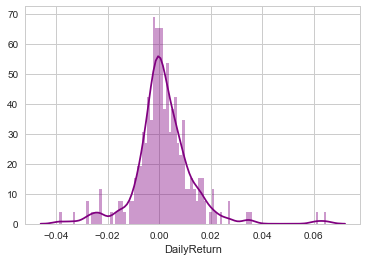

In [15]:
sns.distplot(AAPL['DailyReturn'].dropna(), bins=100, color='purple') #distplot gives histogram and KDE

In [16]:
df= pd.DataFrame([AAPL['DailyReturn'],GOOG['Close'].pct_change(),MSFT['Close'].pct_change(),AMZN['Close'].pct_change()], index=[['AAPL','GOOG','MSFT','AMZN']])

In [20]:
df1=df.transpose()


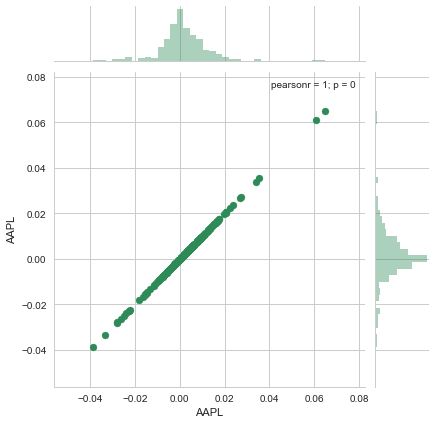

In [21]:
sns.jointplot('AAPL','AAPL',df1,kind='scatter',color='seagreen')

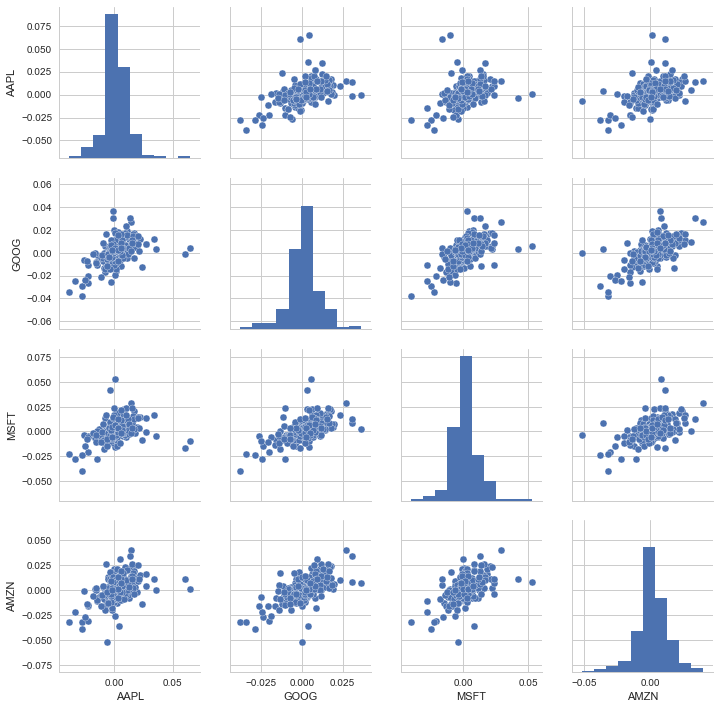

In [23]:
sns.pairplot(df1.dropna()) # to check correlation

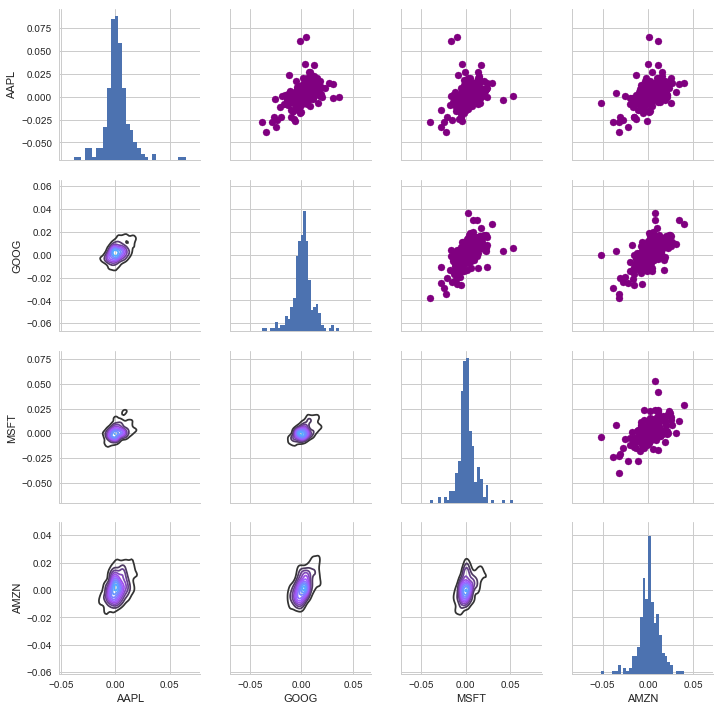

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(df1.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [30]:
df2=df1.dropna()